In [18]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('stock_price_translated.csv')
df.head()

,Date,Close,Open,High,Low,Volume,Change %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [14]:
df.shape

(9202, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9202 non-null   object 
 1   Close     9202 non-null   float64
 2   Open      9202 non-null   float64
 3   High      9202 non-null   float64
 4   Low       9202 non-null   float64
 5   Volume    9202 non-null   object 
 6   Change %  9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [16]:
df.describe()

,Close,Open,High,Low
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


In [17]:
df.isnull().sum()

Date        0
Close       0
Open        0
High        0
Low         0
Volume      0
Change %    0
dtype: int64

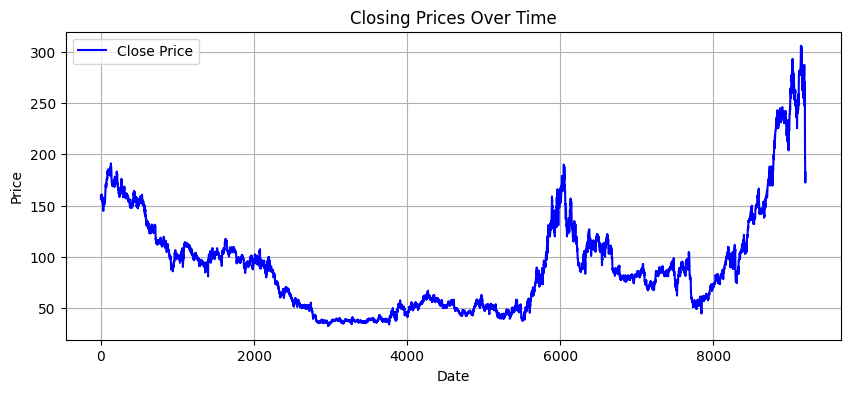

In [23]:
# Plot the closing prices over time
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


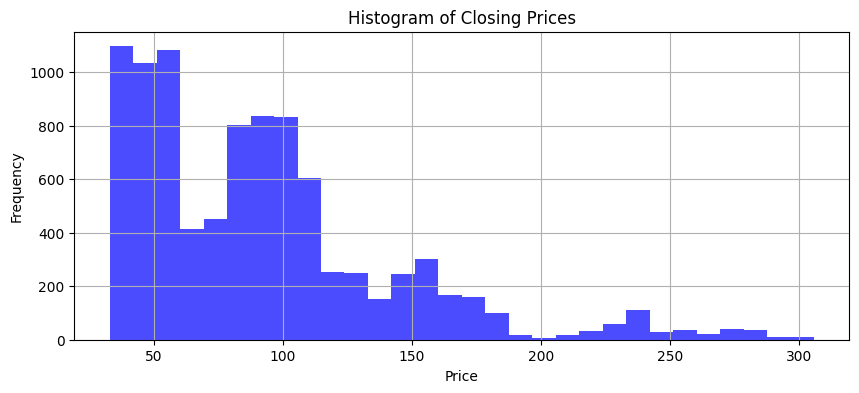

In [24]:
# Plot histogram of closing prices
plt.figure(figsize=(10, 4))
plt.hist(df['Close'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

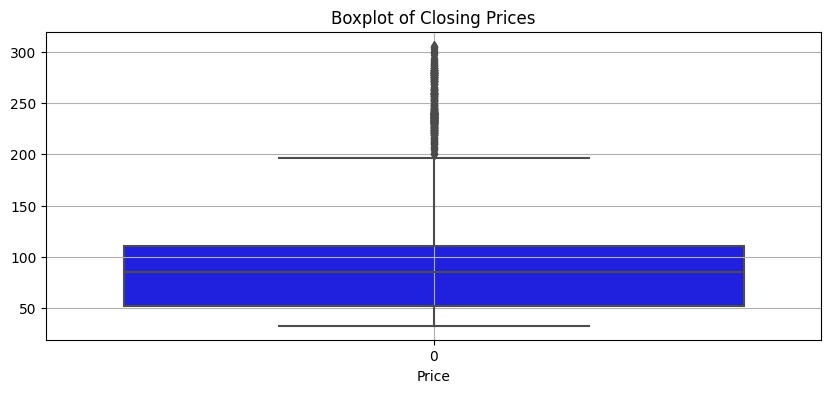

In [25]:
# Plot boxplot to identify outliers
plt.figure(figsize=(10, 4))
sns.boxplot(df['Close'], color='blue')
plt.title('Boxplot of Closing Prices')
plt.xlabel('Price')
plt.grid()
plt.show()

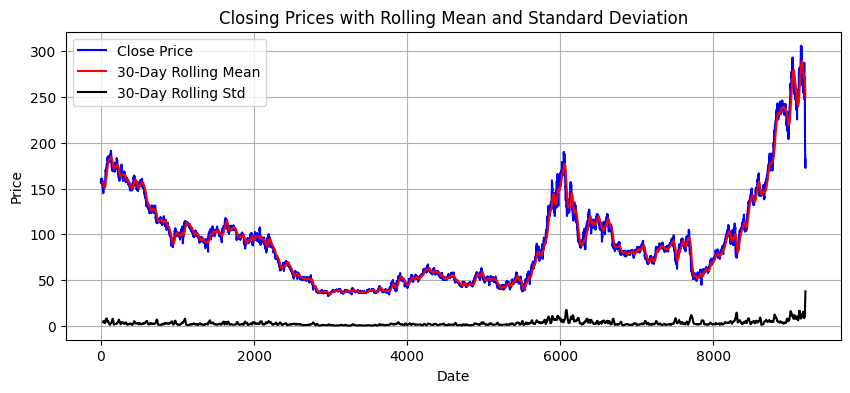

In [32]:

# Checking for seasonal trends using rolling mean
rolling_mean = df['Close'].rolling(window=30).mean()  # 30-day rolling mean
rolling_std = df['Close'].rolling(window=30).std()    # 30-day rolling std 



plt.figure(figsize=(10,4))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='red')
plt.plot(rolling_std, label='30-Day Rolling Std', color='black')
plt.title('Closing Prices with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


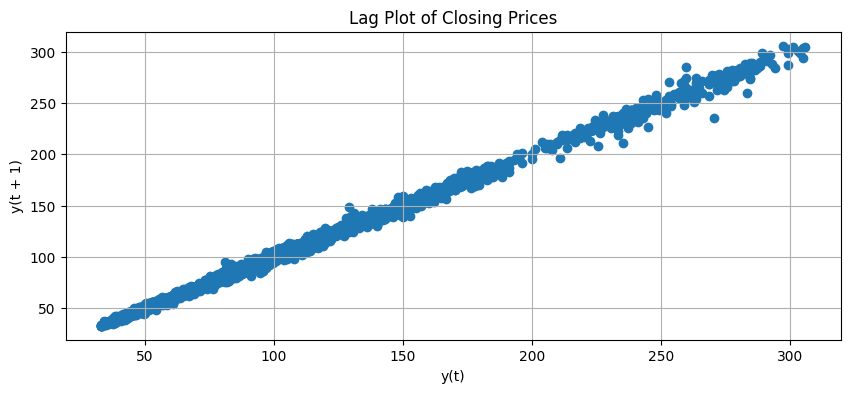

In [34]:
# Lag plot to check for autocorrelation
from pandas.plotting import lag_plot
plt.figure(figsize=(10, 4))
lag_plot(df['Close'])
plt.title('Lag Plot of Closing Prices')
plt.grid()
plt.show()

c:\Users\Satheesh Bhukya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


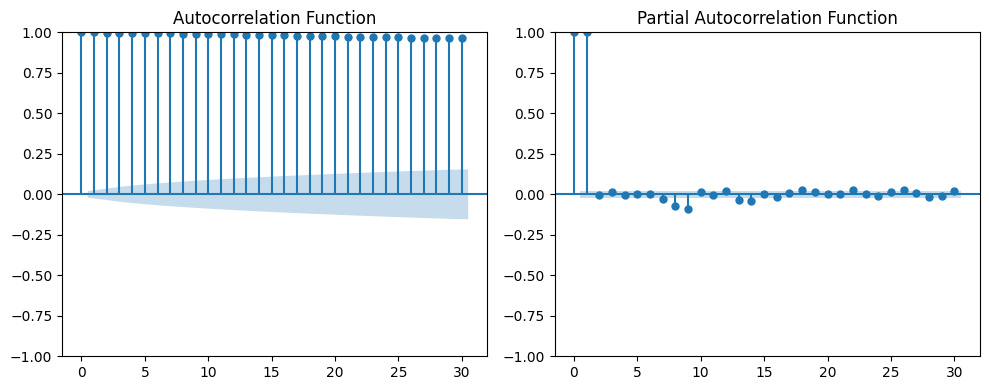

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_acf(df['Close'].dropna(), ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')
plt.subplot(122)
plot_pacf(df['Close'].dropna(), ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

ADF Statistic: -15.765887132120277
p-value: 1.1766290673802043e-28
ARIMA(0,0,0) - MSE: 9.313501884041095, MAE: 1.7817650967496732
ARIMA(0,0,1) - MSE: 9.313499489691782, MAE: 1.7817615076921431
ARIMA(0,0,2) - MSE: 9.313491970724177, MAE: 1.7817573538416043
ARIMA(0,1,0) - MSE: 9.617039652362843, MAE: 1.9431287343834869
ARIMA(0,1,1) - MSE: 9.313033060459917, MAE: 1.7807250343879582
ARIMA(0,1,2) - MSE: 9.313453495885987, MAE: 1.781662134364201
ARIMA(1,0,0) - MSE: 9.313499589014288, MAE: 1.7817616264462475
ARIMA(1,0,1) - MSE: 9.313497295584066, MAE: 1.7817585541411012
ARIMA(1,0,2) - MSE: 9.313430600839766, MAE: 1.781743655832545
ARIMA(1,1,0) - MSE: 9.462392803837753, MAE: 1.8825846938304085
ARIMA(1,1,1) - MSE: 9.313495767110426, MAE: 1.781753438478201
ARIMA(1,1,2) - MSE: 9.313835538955457, MAE: 1.7816702575815506
ARIMA(2,0,0) - MSE: 9.313493140119622, MAE: 1.7817575904433043
ARIMA(2,0,1) - MSE: 9.313433735073003, MAE: 1.781746806641016
ARIMA(2,0,2) - MSE: 9.31346985318369, MAE: 1.7817799387

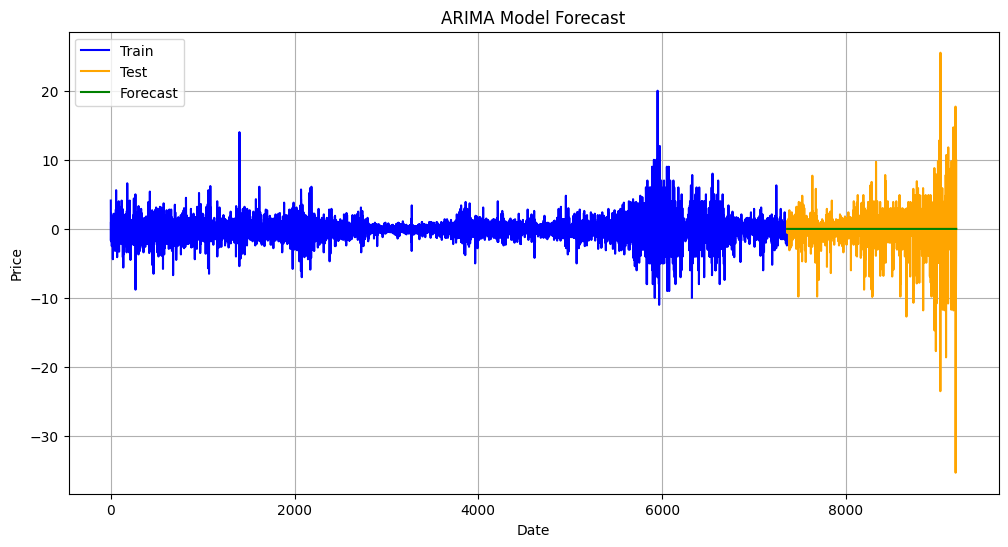

In [42]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Preprocessing: Remove any missing values 4
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
df = df.dropna()

# Keeping only the 'Close' column for the stock price prediction
df = df[['Close']]

# Function to check stationarity
def check_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] <= 0.05  # If p-value is less than 0.05, the series is stationary

# Check for stationarity
is_stationary = check_stationarity(df['Close'])
if not is_stationary:
    print("Data is not stationary. Differencing will be applied.")
    df['Close'] = df['Close'].diff().dropna()  # Apply differencing and drop NaN values
    df = df.dropna()  # Ensure no NaN values remain after differencing
    check_stationarity(df['Close'])

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Hyperparameter tuning
best_mse = float('inf')
best_order = None

# Try different (p, d, q) values for ARIMA
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                predictions = model_fit.forecast(steps=len(test))
                
                mse = mean_squared_error(test, predictions)
                mae = mean_absolute_error(test, predictions)
                
                print(f'ARIMA({p},{d},{q}) - MSE: {mse}, MAE: {mae}')
                
                if mse < best_mse:
                    best_mse = mse
                    best_order = (p, d, q)

            except Exception as e:
                print(f'Error fitting ARIMA({p},{d},{q}): {e}')
                continue

# Check if best_order was found
if best_order is None:
    print("No valid ARIMA model was found.")
else:
    print(f'Best ARIMA order: {best_order} with MSE: {best_mse}')

    # Fit the best ARIMA model
    best_model = ARIMA(train, order=best_order)
    best_model_fit = best_model.fit()

    # Forecasting
    forecast = best_model_fit.forecast(steps=len(test))

    # Evaluate the model
    mse_final = mean_squared_error(test, forecast)
    mae_final = mean_absolute_error(test, forecast)

    print(f'Final Model MSE: {mse_final}, MAE: {mae_final}')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(test.index, forecast, label='Forecast', color='green')
    plt.title('ARIMA Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

ADF Statistic: -15.765887132120277
p-value: 1.1766290673802043e-28
ARIMA(0,0,0) - MSE: 9.313501884041095, MAE: 1.7817650967496732
ARIMA(0,0,1) - MSE: 9.313499489691782, MAE: 1.7817615076921431
ARIMA(0,0,2) - MSE: 9.313491970724177, MAE: 1.7817573538416043
ARIMA(0,0,3) - MSE: 9.313588444143857, MAE: 1.7818576046856083
ARIMA(0,1,0) - MSE: 9.617039652362843, MAE: 1.9431287343834869
ARIMA(0,1,1) - MSE: 9.313033060459917, MAE: 1.7807250343879582
ARIMA(0,1,2) - MSE: 9.313453495885987, MAE: 1.781662134364201
ARIMA(0,1,3) - MSE: 9.313465142001053, MAE: 1.7816993740040858
ARIMA(1,0,0) - MSE: 9.313499589014288, MAE: 1.7817616264462475
ARIMA(1,0,1) - MSE: 9.313497295584066, MAE: 1.7817585541411012
ARIMA(1,0,2) - MSE: 9.313430600839766, MAE: 1.781743655832545
ARIMA(1,0,3) - MSE: 9.313493079696174, MAE: 1.781800335779618
ARIMA(1,1,0) - MSE: 9.462392803837753, MAE: 1.8825846938304085
ARIMA(1,1,1) - MSE: 9.313495767110426, MAE: 1.781753438478201
ARIMA(1,1,2) - MSE: 9.313835538955457, MAE: 1.781670257

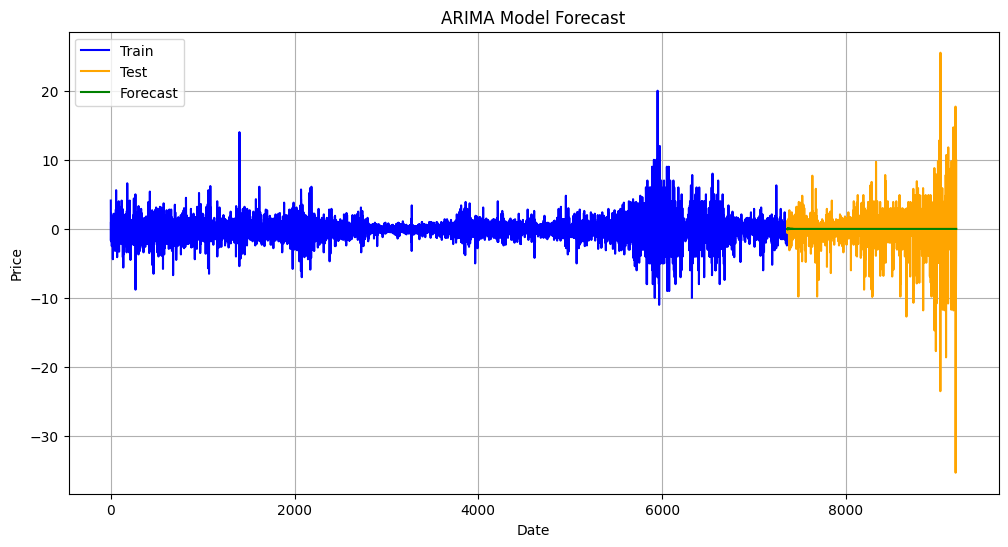

In [44]:
import itertools
df = df[['Close']].dropna()

# Function to check stationarity
def check_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] <= 0.05  # If p-value is less than 0.05, the series is stationary

# Check for stationarity
is_stationary = check_stationarity(df['Close'])
if not is_stationary:
    print("Data is not stationary. Differencing will be applied.")
    df['Close'] = df['Close'].diff().dropna()  # Apply differencing and drop NaN values
    df = df.dropna()  # Ensure no NaN values remain after differencing
    check_stationarity(df['Close'])

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Hyperparameter tuning
best_mse = float('inf')
best_order = None

# Try different (p, d, q) values for ARIMA
p_values = range(0, 4)  # Extended range for p
d_values = range(0, 2)   # Keeping d to 0 or 1 for simplicity
q_values = range(0, 4)   # Extended range for q
pdq = list(itertools.product(p_values, d_values, q_values))

for order in pdq:
    p, d, q = order
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        
        mse = mean_squared_error(test, predictions)
        mae = mean_absolute_error(test, predictions)
        
        print(f'ARIMA({p},{d},{q}) - MSE: {mse}, MAE: {mae}')
        
        if mse < best_mse:
            best_mse = mse
            best_order = order

    except Exception as e:
        print(f'Error fitting ARIMA({p},{d},{q}): {e}')
        continue

# Check if best_order was found
if best_order is None:
    print("No valid ARIMA model was found.")
else:
    print(f'Best ARIMA order: {best_order} with MSE: {best_mse}')

    # Fit the best ARIMA model
    best_model = ARIMA(train, order=best_order)
    best_model_fit = best_model.fit()

    # Forecasting
    forecast = best_model_fit.forecast(steps=len(test))

    # Evaluate the model
    mse_final = mean_squared_error(test, forecast)
    mae_final = mean_absolute_error(test, forecast)

    print(f'Final Model MSE: {mse_final}, MAE: {mae_final}')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(test.index, forecast, label='Forecast', color='green')
    plt.title('ARIMA Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

ADF Statistic: -15.765887132120277
p-value: 1.1766290673802043e-28
SARIMA(0, 0, 0)x(0, 0, 0, 0) - MSE: 9.313501884041095, MAE: 1.7817650967496732
SARIMA(0, 0, 0)x(1, 0, 1, 12) - MSE: 9.313512088456816, MAE: 1.7817714722937958
SARIMA(0, 0, 0)x(1, 1, 1, 12) - MSE: 9.314575171865016, MAE: 1.7885496460071135
SARIMA(0, 0, 1)x(0, 0, 0, 0) - MSE: 9.313499489691782, MAE: 1.7817615076921431
SARIMA(0, 0, 1)x(1, 0, 1, 12) - MSE: 9.313509602616724, MAE: 1.781767886504007
SARIMA(0, 0, 1)x(1, 1, 1, 12) - MSE: 9.314554470656953, MAE: 1.7885559256078842
SARIMA(0, 0, 2)x(0, 0, 0, 0) - MSE: 9.313491970724177, MAE: 1.7817573538416043
SARIMA(0, 0, 2)x(1, 0, 1, 12) - MSE: 9.313501683510596, MAE: 1.7817634873105397
SARIMA(0, 0, 2)x(1, 1, 1, 12) - MSE: 9.314487540102043, MAE: 1.788571655209216
SARIMA(0, 0, 3)x(0, 0, 0, 0) - MSE: 9.313588444143857, MAE: 1.7818576046856083
SARIMA(0, 0, 3)x(1, 0, 1, 12) - MSE: 9.31359301262428, MAE: 1.7818604982198214
SARIMA(0, 0, 3)x(1, 1, 1, 12) - MSE: 9.314485432076733, MAE:

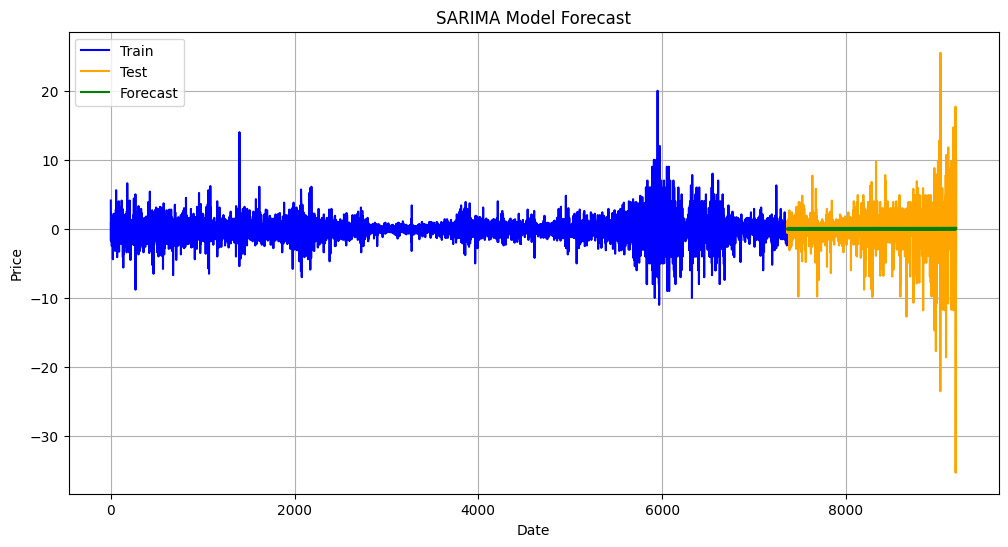

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import itertools

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment this and load your dataset
df = df[['Close']].dropna()  # Assuming df is already defined

# Function to check stationarity
def check_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] <= 0.05  # If p-value is less than 0.05, the series is stationary

# Check for stationarity
is_stationary = check_stationarity(df['Close'])
if not is_stationary:
    print("Data is not stationary. Differencing will be applied.")
    df['Close'] = df['Close'].diff().dropna()  # Apply differencing and drop NaN values
    df = df.dropna()  # Ensure no NaN values remain after differencing
    check_stationarity(df['Close'])

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Hyperparameter tuning
best_mse = float('inf')
best_order = None

# Try different (p, d, q) values for ARIMA including seasonal parameters
p_values = range(0, 4)  # Extended range for p
d_values = range(0, 2)   # Keeping d to 0 or 1 for simplicity
q_values = range(0, 4)   # Extended range for q
pdq = list(itertools.product(p_values, d_values, q_values))

# Adding seasonal parameters (P, D, Q) for SARIMA
seasonal_pdq = [(0, 0, 0, 0), (1, 0, 1, 12), (1, 1, 1, 12)]  # Adjust the seasonal periods as needed

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = ARIMA(train, order=order, seasonal_order=seasonal_order)
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test))
            
            mse = mean_squared_error(test, predictions)
            mae = mean_absolute_error(test, predictions)
            
            print(f'SARIMA{order}x{seasonal_order} - MSE: {mse}, MAE: {mae}')
            
            if mse < best_mse:
                best_mse = mse
                best_order = (order, seasonal_order)

        except Exception as e:
            print(f'Error fitting SARIMA{order}x{seasonal_order}: {e}')
            continue

# Check if best_order was found
if best_order is None:
    print("No valid ARIMA model was found.")
else:
    print(f'Best SARIMA order: {best_order[0]} with seasonal order: {best_order[1]} and MSE: {best_mse}')

    # Fit the best SARIMA model
    best_model = ARIMA(train, order=best_order[0], seasonal_order=best_order[1])
    best_model_fit = best_model.fit()

    # Forecasting
    forecast = best_model_fit.forecast(steps=len(test))

    # Evaluate the model
    mse_final = mean_squared_error(test, forecast)
    mae_final = mean_absolute_error(test, forecast)

    print(f'Final Model MSE: {mse_final}, MAE: {mae_final}')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(test.index, forecast, label='Forecast', color='green')
    plt.title('SARIMA Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

Final Model MSE: 9.311078538662578, MAE: 1.783775988862428